In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

### 1. Write a function to generate a data matrix X. Inputs: Number of samples, feature dimension. Output: Data matrix X.    

In [2]:
#define a function to calculate data matrix X
def data_matrix(samples,dim):
    #for returning random output in every execution according to number of sample and feature dimension
    return np.random.normal(size=(samples, dim))

In [3]:
# unit test
# x = data_matrix(100,5)
# x

### 2. Write a function to generate dependent variable column t.                                                                                
a) Inputs: Data matrix X, weight vector for each column, bias w0, noise variance

b) Output: Target vector t

In [4]:
# this function uses the numpy.random.normal function to generate random numbers with a normal distribution. 
# The loc parameter specifies the mean of the distribution, which is set to 0. 
# The scale parameter specifies the standard deviation of the distribution,
# which is set to the value of the std_dev input argument.
# The size parameter specifies the number of random numbers to generate.
#generates an array of random numbers that follows a normal distribution with a mean of 0 and a standard deviation of "noise_variance"
def noise_def(std_dev,s):
    return np.random.normal(0, scale=std_dev, size=s)

#As we have to generate the dependent variable t
#Acoording to {t = (x*w) + w0 + noise}
def depend_t(X, weight, w0, std_var):
    # To calculate the dot product of X and weights
    dot_prod = np.dot(X, weight)
    # To add the bias in the dot product
    dot_prod =  dot_prod + w0
    #to get shape of above dot product
    shape_dot_prod = dot_prod.shape
    # adding noise to the dot product
    noise = noise_def(std_var,shape_dot_prod)
    t = dot_prod + noise
    return t

In [5]:
# unit testing
# x = data_matrix(100,5)
# w = np.random.normal(5)
# w0 = 5
# std_dev = 0.1
# t = depend_t(x,w,w0,std_dev)
# print(t)

### 3. Write a function to compute a linear regression estimate.

a) Input: data matrix X and weight vector w

b) Output: y

In [6]:
# define function to compute a linear regression estimate
def linear_reg_estim(X, w):# here x is data matrix and w is weight vector
    # matrix multiplication using "@" operator
    y = ((np.dot(X, w)) + w0)
    return y
# def linear_reg_estim(X, w):
#     # Add column of ones to X for bias term
#     X = np.hstack((np.ones((X.shape[0], 1)), X))
#     # Compute the linear regression estimate
#     y = np.dot(X, np.hstack((w0,w)))
#     return y

In [7]:
# unit testing
# X = data_matrix(100,5)
# w = np.random.randn(5)
# w0 = 5
# y = linear_reg_estim(X,w)
# print(y)

### 4.Write a function to compute the mean square error of two vectors y and t.

In [8]:
# define function to compute the mean square error
def MSE(y,t):
    error = np.sum(np.square(y,t)) / (np.shape(y)[0]) #MSE to calculation formula
    return error

In [9]:
# # unit testing
# X = data_matrix(100,5)
# w = np.random.randn(5)
# std_dev = 0.1
# w0 = 5
# t = depend_t(X,w,w0,std_dev)
# y = linear_reg_estim(X,w)
# mse = MSE(y,t)
# mse


### 5. Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization
a) Input: X, t, and lambda

b) Output: w, MSE, y

In [45]:
# The input to the function is a matrix X of feature values, a vector t of target values, and a scalar
# lamda representing the regularization strength. The output is a vector w of weights,
# a scalar MSE representing the mean squared error between the predicted and actual target values,
# and a vector y of predicted target values.
def linear_regression_pinv(X, t, lamda):
    
    # Add a column of ones to the input matrix X for the bias term
    # X = np.hstack((np.ones((X.shape[0], 1)), X))
    I = np.identity(X.shape[1]) #np.identity for the identity matrix
    # Calculate the weights
    #this function uses the numpy library and its function np.linalg.pinv for the pseudo-inverse calculation
    w = np.linalg.pinv(X.T @ X + lamda * I) @ X.T @ t #where (lamda * I) is the regulaization term
    y = linear_reg_estim(X,w)
    loss_Mse = MSE(y,t)# a scalar MSE representing the mean squared error between the predicted and actual target values,
    return w,y,loss_Mse



In [47]:
# unit testing
# X = data_matrix(100,5)
# w = np.random.randn(5)
# std_dev = 0.1
# w0 = 5
# t = depend_t(X,w,w0,std_dev)
# w,y,loss_Mse = linear_regression_pinv(X,t,0.2)
# print(w,y,loss_Mse)

### 6. Write a function to compute the gradient of MSE with respect to its weight vector.
a) Input: X matrix, t vector, and w vector

b) Output: gradient vector 

In [12]:
# The input to the function is a matrix X of feature values,
# a vector t of target values, and a vector w of weights. 
# The output is a gradient vector.
# This function calculates the dot product of X and w (y)
# which is the prediction, then computes the gradient of the MSE 
# by taking the derivative of the MSE function with respect to w.
# The gradient is the sum of the product of the transpose of X
# and the difference between y and t, all divided by the number of samples
def mse_grad(X, t, w):
    y = linear_reg_estim(X,w)
    N = np.shape(X)[0] # to calculate number of samples
    grad = (2*X.T) @ (y - t) / N #applying gradient MSE formula
    return grad

    

In [13]:
# unit testing
# X = data_matrix(100,5)
# w = np.random.randn(5)
# std_dev = 0.1
# w0 = 5
# t = depend_t(X,w,w0,std_dev)
# grad = mse_grad(X,t,w)
# print(grad)

### 7. Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0. 

In [14]:
#define a function to compute L2 norm
def L2_norm(w):
    # exclude bias term (w0)
    w = w[1:]
    # calculate L2 norm
    norm = np.linalg.norm(w)
    return norm

In [15]:
# unit testing
# w = np.random.randn(5)
# w0 = 5
# w[0] = w0
# norm = L2_norm(w)
# print(norm)

### 8. Write a function to compute the gradient of L2 norm with respect to the weight vectors.

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.

In [16]:
# The function takes in the input matrix X and weight vector w,
# calculates the L2 norm of the weight vector, and 
# then calculates the gradient vector.
# The gradient with respect to the first element of the weight vector (w0) is set to 0.
def L2_norm_gradient(X, w):
    # calculate the L2 norm of the weight vector
    L2norm = L2_norm(w)
    # calculate the gradient vector
    grad = 2 * w / L2norm
    # set the gradient with respect to w0 to 0
    grad[0] = 0
    return grad


In [17]:
# unit testing
# X = data_matrix(100,5)
# w = np.random.randn(5)
# w0 = 5
# w[0] = w0
# grad = L2_norm_gradient(X,w)
# print(grad)

### 9. Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0.

In [18]:
# This function uses numpy's abs function to take the absolute value of each element
# in the array, and then uses the sum function to add up all of the absolute values.
# The slice w[1:] is to exclude the bias term w0.
#define a function to compute L1 norm
def L1_norm(w):
    norm = np.abs(w[1:]).sum()
    return norm

In [19]:
# unit testing
# w = np.random.randn(5)
# w0 = 5
# w[0] = w0
# norm = L1_norm(w)
# print(norm)

### 10. Write a function to compute the gradient of L1 norm with respect to the weight vectors.

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.

In [20]:
# The function takes in the input matrix X and weight vector w,
# calculates the L2 norm of the weight vector, and 
# then calculates the gradient vector.
# The gradient with respect to the first element of the weight vector (w0) is set to 0.
def L1_norm_gradient(X, w):
    # calculate the L1 norm of the weight vector
    L1norm = L1_norm(w)
    # calculate the gradient vector
    grad = 2 * w / L1norm
    # set the gradient with respect to w0 to 0
    grad[0] = 0
    return grad

In [21]:
# unit testing
# X = data_matrix(100,5)
# w = np.random.randn(5)
# w0 = 5
# w[0] = w0
# grad = L1_norm_gradient(X,w)
# print(grad)

### 11. Write a function for a single update of weights of linear regression using gradient descent.

a) Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1

b) Output: updated weight and updated MSE

In [22]:
# This function takes input X, t, w, eta, lambda 2, lambda 1 and 
# will update the weights using gradient descent with L1 and L2 regularization.
# It will output the updated weight and the mean squared error.
# It uses the equation : w = w - eta*(X.T @ error + lambda_2w + lambda_1np.sign(w))
# eta = 0.2
# lambda_1=L1_norm(w)
# lambda_2=L2_norm(w)

# define a function for a single update of weights of linear regression using gradient descent.
def linear_regression_update(X, t, w, eta, lambda_2, lambda_1):
    y = linear_reg_estim(X,w) #calculating y by calling linear regression estimation  function
    gradient = 2 * np.dot(X.T, (y - t)) / X.shape[0] + 2 * lambda_2 * w + lambda_1 * np.sign(w)
    #gradient = X.T @ error + lambda_2*w + lambda_1*np.sign(w)
    w = w - eta*gradient
    y = linear_reg_estim(X,w) # recalculating y from new weight
    t = depend_t(X,w,w0,eta) #calling depend_t function to calculate target variable
    mse = MSE(y,t) #calculating MSE by calling MSE function
    return w, mse

In [23]:
# unit testing
# X = data_matrix(100,5)
# w = np.random.randn(5)
# eta = 0.2
# lambda_1=L1_norm(w)
# lambda_2=L2_norm(w)
# std_dev = 0.1
# w0 = 5
# t = depend_t(X,w,w0,std_dev)
# w,mse = linear_regression_update(X, t, w, eta, lambda_2, lambda_1)
# print(w,mse)

### 12. Write a function to estimate the weights of linear regression using gradient descent.

a) Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE

b) Output: Final w, final RMSE normalized with respect to variance of t.

c) Stopping criteria: Either max_iter has been reached, or the normalized RMSE does not change by more than min_change_NRMSE

In [24]:
# This function takes the input X and t (target values) and the hyperparameters lambda2, lambda1, eta (learning rate),
# max_iter (maximum number of iterations), and min_change_NRMSE (minimum change in normalized root mean squared error).
# It returns the final weight vector w and the final normalized root mean squared error.
# The stopping criteria are either reaching the maximum number of iterations 
# or the change in normalized root mean squared error is less than the minimum change.

#define a a function to estimate the weights of linear regression using gradient descent
def linear_regression_weights_gd(X, t, lambda2, lambda1, eta, max_iter, min_change_NRMSE):
    w = np.zeros(X.shape[1])
    t_var = np.var(t) #using numpy to calculate variance of t
    RMSE_prev = float("inf")
    for i in range(max_iter):
        y = linear_reg_estim(X,w)
        RMSE = MSE(y,t) / (t_var + 1e-8)
        if abs(RMSE - RMSE_prev) < min_change_NRMSE:
            break
        RMSE_prev = RMSE
        w1, RMSE = linear_regression_update(X,t,w,eta,lambda2,lambda1) 
    return w1, RMSE

In [25]:
#unit testing
# std_dev = 0.1
# X = data_matrix(100,5)
# w0 = 2
# w = np.random.randn(5)
# t = depend_t(X,w,w0,std_dev)
# w1,RMSE = linear_regression_weights_gd(X,t,0,0,0.1,100,0.0001)
# print(w1,RMSE)

### 13. Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

#### a) Training and validation NRMSE obtained using pseudo inverse with number of training samples.




In [66]:
# Define a function to calculate NRMSE
def NRMSE(t_train,t_pred):
    return np.sqrt(np.mean((t_train - t_pred)**2)) / np.std(t_train) #using formula for calculating NRMSE

# define a function to split into training and validation data
def split(x,t,train_frac):
    N = X.shape[0] #sample size
    N_train= int(N*train_frac) 
    N_val = N - N_train
    indices = np.arange(N)
    # Split data into training and validation sets
    indices = np.random .permutation(indices)
    X_train = X[indices[:N_train]]
    t_train = t[indices[:N_train]]
    X_val = X[indices[N_train:]]
    t_val = t[indices[N_train:]]
    return X_train,t_train,X_val,t_val

#define a function to calculate Training and validation NRMSE obtained using pseudo inverse with number of training samples.
def experiment_Pseudo(X,t,lamda,training_samples,train_frac):
    # Initialize arrays to store NRMSE results for each experiment
    training_nrmse = np.zeros(training_samples)
    validation_nrmse = np.zeros(training_samples)
    for i in range(training_samples):
        X_train , t_train , X_val , t_val = split(X,t,train_frac)
        w1,_,_ = linear_regression_pinv(X_train,t_train,lamda)
        w2,_,_ = linear_regression_pinv(X_val,t_val,lamda)
        # Calculate NRMSE for training and validation data
        t_pred_train =linear_reg_estim(X_train , w1)
        t_pred_val =linear_reg_estim(X_val , w2)
        # Store NRMSE results
        training_nrmse[i] = NRMSE(t_train,t_pred_train)
        validation_nrmse[i] = NRMSE(t_val,t_pred_val)
    return training_nrmse,validation_nrmse  


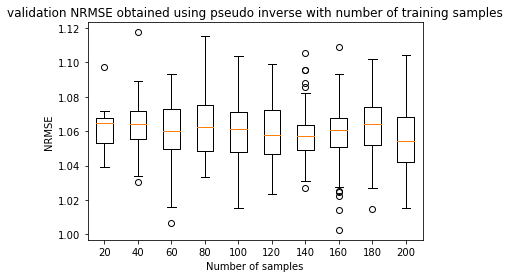

In [77]:
# initializing terms
std_dev = 0.1
np.random.seed(1)
N = 100
D = 5
X = data_matrix(N,D)
w0 = 2
w = np.random.randn(D)
t = depend_t(X,w,w0,std_dev)
n_experiments = 10
lamda = 0.01
train_frac = 0.2
start_trials = 20
#define a empty list
val = []
#define x axis label for plot
label= ["{}".format(x*start_trials)for x in range(1,n_experiments+1)]

#running a for loop to get different training validation nrmse for different number of variables
for training_samples in range(10,110,10):
    #calling experiment psedo function to get training and validation samples
    training_nrmse, validation_nrmse = experiment_Pseudo(X,t,lamda,training_samples,train_frac)
    val.append(validation_nrmse)#adding validation nrmse in the list
#ploting boxplot   
fig, ax = plt.subplots()
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
ax.set_xlabel('Number of samples')
plt.title("validation NRMSE obtained using pseudo inverse with number of training samples")
plt.show()


# we can absorb from the plot that as we increase the number of samples the median of the Nrmse become more stable
# and nrmse decrease a little bit because as we increse number of samples the model will train and set the validation
# data in better way 

#### b) Training and validation NRMSE obtained using pseudo inverse with number of variables.

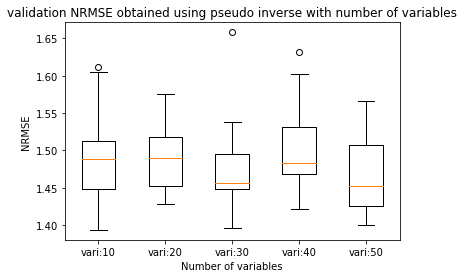

In [85]:
#initializing terms
np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
t = depend_t(X,w,w0,std_dev)
lamda = 0.01
train_frac = 0.2
num_trails = 20
#define a empty list
val =[]
#define x axis label for plot
label= ["vari:{}".format(X) for X in range(10,51,10)]

#running a for loop to get different training validation nrmse for different number of variables
for num_var in range(10,51,10):
    training_nrmse, validation_nrmse = experiment_Pseudo(X[:,:num_var],t,lamda,num_trails,train_frac)
    val.append(validation_nrmse)#adding validation nrmse in the list
#ploting boxplot  
fig, ax = plt.subplots()
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
ax.set_xlabel('Number of variables')
plt.title("validation NRMSE obtained using pseudo inverse with number of variables")
plt.show()
# we can absorb from the plot that as we increase the number of variables there is an almost constant behaviour in 
# the plot because  as we change  the number of variables there is no much effect in nrmse

#### c) Training and validation NRMSE obtained using pseudo inverse with noise variance.

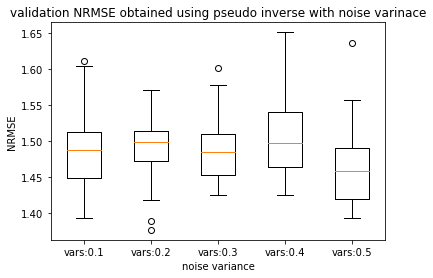

In [89]:
#initializing terms
np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
#define a empty list
val = []
#define x axis label for plot
label = ["vars:{}".format(X/10) for X in range(1,6,1)]

#running a for loop to get different training validation nrmse for different noise variance
for var in range(1,6,1):
    t = depend_t(X,w,w0,float(var/10))
    training_nrmse, validation_nrmse = experiment_Pseudo(X,t,lamda,num_trails,train_frac)
    val.append(validation_nrmse)#adding validation nrmse in the list
#ploting boxplot  
fig, ax = plt.subplots()
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
ax.set_xlabel('noise variance')
plt.title("validation NRMSE obtained using pseudo inverse with noise varinace")
plt.show()

#### d)Training and validation NRMSE obtained using pseudo inverse with w0.

In [ ]:
np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
val = []
label = ["trails:{}".format(X) for X in range(1,11,2)]

for var in range(1,11,2):
    w[0] = w0 
    training_nrmse, validation_nrmse = experiment_Pseudo(X,t,lamda,num_trails,train_frac)
    val.append(validation_nrmse)
    
fig, ax = plt.subplots()
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("validation NRMSE obtained using pseudo inverse with w0.")
plt.show()

#### e) Training and validation NRMSE obtained using pseudo inverse with lambda2.

In [ ]:
np.random.seed(0)
N = 100
D = 5
w0 = 5
std_dev = 0.1
lamda2 = []
for i in range(1,6):
    np.random.seed(i)
    X = data_matrix(N,D)
    w = np.random.randn(D)
    lamda2.append(L2_norm(w))
    
val = []
label = ["lamda2_{}".format(X) for X in range(1,6)]

for var_L2 in lamda2: 
    training_nrmse, validation_nrmse_lamda2 = experiment_Pseudo(X,t,var_L2,num_trails,train_frac)
    val.append(validation_nrmse_lamda2)

optimal_lamda2 = lamda2[np.argmin(validation_nrmse_lamda2)]
fig, ax = plt.subplots()
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("NRMSE obtained using pseudo inverse with lambda2")
plt.show()

#### f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points.

In [ ]:
def pseudo_inv(X):
    I = np.identity(X.shape[1]) #np.identity for the identity matrix
    # Calculate the weights
    #this function uses the numpy library and its function np.linalg.pinv for the pseudo-inverse calculation
    p = np.linalg.pinv(X.T @ X) @ X.T
    return p

samples = np.arange(10,1000,10)
variable = np.arange(10,1000,10)

time_taken = []

for i in range(len(samples)):
    X = data_matrix(samples[i],variable[i])
    #to get starting time
    start_t = time.time()    
    #calling pseudo inverse function to calculate pseudo inverse of different samples
    pseudo_inverse = pseudo_inv(X)
    #to get end time 
    end_t = time.time()
    #calculate time taken for one iteration and append in the list
    timetaken = (end_t-start_t)
    time_taken.append(timetaken)

plt.scatter(samples,variable,c=time_taken,cmap='viridis')
plt.colorbar()
plt.ylabel('number of variables')
plt.xlabel('number of samples')
plt.show()
    

    

#### g) Training and validation NRMSE obtained using gradient descent with max_iter

In [ ]:
def experiment_gradient_max_iter(max_iter,X,t,lamda,training_samples,train_frac):
    # Initialize arrays to store NRMSE results for each experiment
    training_nrmse = np.zeros(training_samples)
    validation_nrmse = np.zeros(training_samples)
    for i in range(training_samples):
        X_train , t_train , X_val , t_val = split(X,t,train_frac)
        w,_ = linear_regression_weights_gd(X_train,t_train,lamda2,lamda1,eta,max_iter,min_change_NRMSE)
        # w = np.linalg.pinv(X_train).dot(t_train)
        # Calculate NRMSE for traini,wng and validation data
        t_pred_train =linear_reg_estim(X_train,w)
        t_pred_val =linear_reg_estim(X_val,w)
        # Store NRMSE results
        training_nrmse[i] = NRMSE(t_train,t_pred_train)
        validation_nrmse[i] = NRMSE(t_val,t_pred_val)
    return training_nrmse,validation_nrmse 

np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
lamda2=0
lamda1=0
eta = 0.2
max_iter = 10
min_change_NRMSE = 0.0001

val = []

label = ["max_iter:{}".format(X) for X in range(10,210,20)]

for max_iter in range(10,210,20):
    training_nrmse, validation_nrmse = experiment_gradient_max_iter(max_iter,X,t,lamda,num_trails,train_frac)
    val.append(validation_nrmse)
    
fig, ax = plt.subplots(figsize=(12,5))
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("validation NRMSE obtained using gradient descent with max_iter")
plt.show()



#### h) Training and validation NRMSE obtained using gradient descent with eta 

In [ ]:
def experiment_gradient_eta(eta,X,t,lamda,training_samples,train_frac):
    # Initialize arrays to store NRMSE results for each experiment
    training_nrmse = np.zeros(training_samples)
    validation_nrmse = np.zeros(training_samples)
    for i in range(training_samples):
        X_train , t_train , X_val , t_val = split(X,t,train_frac)
        w,_ = linear_regression_weights_gd(X_train,t_train,lamda2,lamda1,eta,max_iter,min_change_NRMSE)
        # w = np.linalg.pinv(X_train).dot(t_train)
        # Calculate NRMSE for traini,wng and validation data
        t_pred_train =linear_reg_estim(X_train,w)
        t_pred_val =linear_reg_estim(X_val,w)
        # Store NRMSE results
        training_nrmse[i] = NRMSE(t_train,t_pred_train)
        validation_nrmse[i] = NRMSE(t_val,t_pred_val)
    return training_nrmse,validation_nrmse 

np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
lamda2=0
lamda1=0
max_iter = 10
min_change_NRMSE = 0.0001

val = []

label = ["eta_{}".format(X/100) for X in range(10,210,20)]

for eta in range(10,210,20):
    training_nrmse, validation_nrmse = experiment_gradient_eta(eta/100,X,t,lamda,num_trails,train_frac)
    val.append(validation_nrmse)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("validation NRMSE obtained using gradient descent with max_iter")
plt.show()


#### i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points

In [ ]:
max_iter = 50
min_change_NRMSE = 0.001
eta = 0.1
lambda_2=1.2
lambda_1=1.5

# X = data_matrix()
def gradient_descent(X, t, lambda2, lambda1, eta, max_iter, min_change_NRMSE):
    t_var = np.var(X)
    RMSE_prev = float("inf")
    for i in range(max_iter):
        y = X@w
        RMSE = MSE(y,t) / (t_var + 1e-8)
        if abs(RMSE - RMSE_prev) < min_change_NRMSE:
            break
        RMSE_prev = RMSE
#         y = X@w
        gradient = 2 * np.dot(X.T, (y - t)) / X.shape[0] + 2 * lambda_2 * w + lambda_1 * np.sign(w)
    return gradient

samples = np.arange(10,1000,20)
variable = np.arange(10,1000,20)

time_taken = []

for i in range(len(samples)):
    X = data_matrix(samples[i],variable[i])
    w =np.random.randn(variable[i])
    t = depend_t(X, w, 5, 0.6)
    #to get starting time
    start_t = time.time()    
    #calling pseudo inverse function to calculate pseudo inverse of different samples
    pseudo_inverse = gradient_descent(X,t,0,0,0.1,max_iter,min_change_NRMSE)
    #to get end time 
    end_t = time.time()
    #calculate time taken for one iteration and append in the list
    timetaken = (end_t-start_t)
    time_taken.append(timetaken)

plt.scatter(samples,variable,c=time_taken,cmap='viridis')
plt.colorbar()
plt.ylabel('number of variables')
plt.xlabel('number of samples')
plt.show()
    

#### j) Time taken to solve gradient descent with number of variables and its breaking point

In [ ]:
max_iter = 50
min_change_NRMSE = 0.001
eta = 0.1
lambda_2=1.2
lambda_1=1.5
bais = 5
var = 0.1
N = 100

# X = data_matrix()
def gradient_descent(X, t, lambda2, lambda1, eta, max_iter, min_change_NRMSE):
    t_var = np.var(X)
    RMSE_prev = float("inf")
    for i in range(max_iter):
        y = X@w
        RMSE = MSE(y,t) / (t_var + 1e-8)
        if abs(RMSE - RMSE_prev) < min_change_NRMSE:
            break
        RMSE_prev = RMSE
#         y = X@w
        gradient = 2 * np.dot(X.T, (y - t)) / X.shape[0] + 2 * lambda_2 * w + lambda_1 * np.sign(w)
    return gradient
samples = np.arange(10,1000,20)
variable = np.arange(10,1000,20)

time_taken = []

for i in range(len(samples)):
    X = data_matrix(N,variable[i])
    w =np.random.randn(variable[i])
    t = depend_t(X, w, bais, var)
    #to get starting time
    start_t = time.time()    
    #calling pseudo inverse function to calculate pseudo inverse of different samples
    pseudo_inverse = gradient_descent(X,t,lambda_2,lambda_1,eta,max_iter,min_change_NRMSE)
    #to get end time 
    end_t = time.time()
    #calculate time taken for one iteration and append in the list
    timetaken = (end_t-start_t)
    time_taken.append(timetaken)

plt.scatter(samples,variable,c=time_taken,cmap='viridis')
plt.colorbar()
plt.ylabel('number of variables')
plt.xlabel('number of samples')
plt.show()

#### k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2

In [ ]:
def calculate_nearly_zero(w, epsilon=1e-3):
    if np.sum(np.abs(w) < epsilon):
        return w
    
def linear_regression_update(X, t, w, eta, lambda_2, lambda_1):
    w = np.zeros(X.shape[1])
    y = linear_reg_estim(X,w)
    gradient = 2 * np.dot(X.T, (y - t)) / X.shape[0] + 2 * lambda_2 * w + lambda_1 * np.sign(w)
    w = w - eta*gradient
    y = linear_reg_estim(X,w)
    t = depend_t(X,w,w0,eta)
    mse = MSE(y,t)
    return w, mse

w = np.zeros(X.shape[1])
def linear_regression_nearly_zero_weights_gd_lamda2(X, t, lamda2, lamda1, eta, max_iter, min_change_NRMSE):
    t_var = np.var(t)
    RMSE_prev = float("inf")
    for i in range(max_iter):
        y = linear_reg_estim(X,w)
        RMSE = MSE(y,t) / (t_var + 1e-8)
        if abs(RMSE - RMSE_prev) < min_change_NRMSE:
            break
        RMSE_prev = RMSE
        w2, RMSE = linear_regression_update(X,t,w,eta,lamda2,lamda1)
        nzw = calculate_nearly_zero(w2)
    return nzw, RMSE

# def calculate_nearly_zero(w, epsilon=1e-2):
#     return np.sum(np.abs(w) < epsilon)


def experiment_gradient_lamda2(X,t,lamda2,eta,training_samples,train_frac):
    # Initialize arrays to store NRMSE results for each experiment
    training_nrmse = np.zeros(training_samples)
    validation_nrmse = np.zeros(training_samples)
    for i in range(training_samples):
        X_train , t_train , X_val , t_val = split(X,t,train_frac)
        
#         w,_ = linear_regression_nearly_zero_weights_gd_lamda2(X_train,t_train,lamda2,0,eta,max_iter,min_change_NRMSE)
        w = np.zeros(X.shape[1])
        # w = np.linalg.pinv(X_train).dot(t_train)
        # Calculate NRMSE for traini,wng and validation data
        t_pred_train =linear_reg_estim(X_train,w)
        t_pred_val =linear_reg_estim(X_val,w)
        # Store NRMSE results
        training_nrmse[i] = NRMSE(t_train,t_pred_train)
        validation_nrmse[i] = NRMSE(t_val,t_pred_val)
    return training_nrmse,validation_nrmse 



In [ ]:
np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
eta = 0.1
# X = data_matrix(N,D)
w0 = 5
# w = np.random.randn(D)
# lamda1=0
max_iter = 100
min_change_NRMSE = 0.0001
std_dev = 0.1
num_trails = 20
lamda_2 = []
for i in range(1,6):
    np.random.seed(i)
    X = data_matrix(N,D)
    w = np.random.randn(D)
    lamda_2.append(L2_norm(w))
print(lamda_2)   
val = []
label = ["L2_{}".format(X) for X in range(1,6)]


for var_L2 in lamda_2:
    training_nrmse, validation_nrmse = experiment_gradient_lamda2(X,t,var_L2,eta,num_trails,train_frac)
    val.append(validation_nrmse)
#     print(validation_nrmse)
    
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("validation NRMSE obtained using gradient descent with max_iter")
plt.show()
# w1,_ = linear_regression_nearly_zero_weights_gd_lamda2(X,t,0.1,lamda1,eta,max_iter,min_change_NRMSE)
# w1


#### l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

In [ ]:
def calculate_nearly_zero(w, epsilon=1e-3):
    if np.sum(np.abs(w) < epsilon):
        return w
    
w = np.zeros(X.shape[1])
def linear_regression_nearly_zero_weights_gd_lamda1(X, t, lamda2, lamda1, eta, max_iter, min_change_NRMSE):
    w = np.zeros(X.shape[1])
    t_var = np.var(t)
    RMSE_prev = float("inf")
    for i in range(max_iter):
        y = linear_reg_estim(X,w)
        RMSE = MSE(y,t) / (t_var + 1e-8)
        if abs(RMSE - RMSE_prev) < min_change_NRMSE:
            break
        RMSE_prev = RMSE
        w1, RMSE = linear_regression_update(X,t,w,eta,lamda2,lamda1)
        nzw = calculate_nearly_zero(w1)
    return nzw, RMSE

# # def calculate_nearly_zero(w, epsilon=1e-2):
# #     return np.sum(np.abs(w) < epsilon)


def experiment_gradient_lamda1(X,t,lamda1,eta,training_samples,train_frac):
    # Initialize arrays to store NRMSE results for each experiment
    training_nrmse = np.zeros(training_samples)
    validation_nrmse = np.zeros(training_samples)
    for i in range(training_samples):
        X_train , t_train , X_val , t_val = split(X,t,train_frac)
#         w,_ = linear_regression_nearly_zero_weights_gd_lamda1(X_train,t_train,0,lamda1,eta,max_iter,min_change_NRMSE)
        w = np.zeros(X.shape[1])
        # w = np.linalg.pinv(X_train).dot(t_train)
        # Calculate NRMSE for traini,wng and validation data
        t_pred_train =linear_reg_estim(X_train,w)
        t_pred_val =linear_reg_estim(X_val,w)
        # Store NRMSE results
        training_nrmse[i] = NRMSE(t_train,t_pred_train)
        validation_nrmse[i] = NRMSE(t_val,t_pred_val)
#         print(validation_nrmse)
    return training_nrmse,validation_nrmse 



In [ ]:
np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
eta = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
# lamda2=0
max_iter = 100
min_change_NRMSE = 0.0001
std_dev = 0.1
num_trails = 20
lamda_1 = []
for i in range(1,6):
    np.random.seed(i)
    X = data_matrix(N,D)
    w = np.random.randn(D)
    lamda_1.append(L1_norm(w))
    
val = []
label = ["L1_{}".format(X) for X in range(1,6)]
# print(lamda_1)

for var_L1 in lamda_1:
    training_nrmse, validation_nrmse = experiment_gradient_lamda1(X,t,var_L1,eta,num_trails,train_frac)
    val.append(validation_nrmse)
#     print(validation_nrmse)
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("validation NRMSE obtained using gradient descent with max_iter")
plt.show()
# w1,_ = linear_regression_nearly_zero_weights_gd_lamda2(X,t,0.1,lamda1,eta,max_iter,min_change_NRMSE)
# w1
# lamda_1

#### m) Training and validation NRMSE for optimal lambda2 with noise variance 

In [ ]:
np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
# optimal_lamda2 = lamda2[np.argmin(validation_nrmse_lamda2)]
val = []

label = ["vars:{}".format(X/10) for X in range(2,11,2)]

for var in range(2,11,2):
    t = depend_t(X,w,w0,float(var/10))
    training_nrmse, validation_nrmse = experiment_Pseudo(X,t,optimal_lamda2,num_trails,train_frac)
    val.append(validation_nrmse)
    
fig, ax = plt.subplots()
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("Number of trails")
plt.show()


#### n) Training and validation NRMSE for optimal lambda1 with noise variance

In [ ]:
np.random.seed(1)
N = 100
D = 5
std_dev = 0.1
X = data_matrix(N,D)
w0 = 5
w = np.random.randn(D)
lamda1 = []
for i in range(1,6):
    np.random.seed(i)
    X = data_matrix(N,D)
    w = np.random.randn(D)
    lamda1.append(L1_norm(w))
    
val = []
label = ["lamda_{}".format(X) for X in range(1,6)]

for var_L1 in lamda1: 
    training_nrmse, validation_nrmse_lamda1 = experiment_Pseudo(X,t,var_L1,num_trails,train_frac)
    val.append(validation_nrmse_lamda1)

optimal_lamda1 = lamda1[np.argmin(validation_nrmse_lamda1)]
val_ = []

label = ["vars:{}".format(X/10) for X in range(2,11,2)]

for var in range(2,11,2):
    t = depend_t(X,w,w0,float(var/10))
    training_nrmse, validation_nrmse = experiment_Pseudo(X,t,optimal_lamda1,num_trails,train_frac)
    val_.append(validation_nrmse)
    
fig, ax = plt.subplots()
ax.boxplot(val)
ax.set_xticklabels(label)
ax.set_ylabel('NRMSE')
plt.title("validation NRMSE for optimal lambda1 with noise variance")
plt.show()

#### o) Experiment (f) but, this time with number of training samples and number of variables

In [ ]:
# def split(X,t,train_frac):
#     N = X.shape[0]
#     N_train= int(N*train_frac)
#     indices = np.arange(N)
#     # Split data into training and validation sets
#     indices = np.random .permutation(indices)
#     X_train = X[indices[:N_train]]
#     t_train = t[indices[:N_train]]
#     return X_train

samples = np.arange(10,100,10)
train_frac = np.arange(0.1,1,0.1)

time_taken = []

for i in range(len(samples)):
    train_samples= int(samples[i]*train_frac[i])
    indices = np.arange(samples[i])
    # Split data into training and validation sets
    indices = np.random.permutation(indices)
    X_train = X[indices[:train_samples]]
    #to get starting time
    start_t = time.time()    
    #calling pseudo inverse function to calculate pseudo inverse of different samples
    pseudo_inverse = pseudo_inv(X_train)
    #to get end time 
    end_t = time.time()
    #calculate time taken for one iteration and append in the list
    timetaken = (end_t-start_t)
    time_taken.append(timetaken)

plt.scatter(samples,train_frac,c=time_taken,cmap='viridis')
plt.colorbar()
plt.ylabel('training fraction')
plt.xlabel('number of samples')
plt.show()
    